In [161]:
import socceraction
from socceraction.data.statsbomb import StatsBombLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from mplsoccer import Pitch, Sbopen, VerticalPitch
import socceraction.spadl as spadl

import warnings
warnings.filterwarnings('ignore')

In [162]:
# Set up the StatsBomb data loader
SBL = StatsBombLoader()

# View all available competitions
df_competitions = SBL.competitions()

In [163]:
# get all the seasons in the dataset for the FA Women's Super League, which the target competion
competition_seasons = df_competitions[df_competitions['competition_name'] == "FA Women's Super League"]
competition_seasons

,season_id,competition_id,competition_name,country_name,competition_gender,season_name
15,90,37,FA Women's Super League,England,female,2020/2021
16,42,37,FA Women's Super League,England,female,2019/2020
17,4,37,FA Women's Super League,England,female,2018/2019


In [164]:
# Create a dataframe with all games from FA Women's Super League 2020/2021 season
df_games = SBL.games(competition_id=37, season_id=90).set_index("game_id")

In [165]:
df_games.head()

,season_id,competition_id,competition_stage,game_day,game_date,home_team_id,away_team_id,home_score,away_score,venue,referee
game_id,,,,,,,,,,,
3775648,90,37,Regular Season,11,2021-02-28 15:00:00,2647,968,0,4,Poundland Bescot Stadium,Lisa Benn
3775609,90,37,Regular Season,13,2021-04-28 20:30:00,968,972,2,0,Meadow Park,Emily Heaslip
3775633,90,37,Regular Season,14,2021-02-06 13:30:00,2647,749,1,0,Poundland Bescot Stadium,Jane Simms
3775570,90,37,Regular Season,18,2021-03-28 13:30:00,965,967,0,5,Broadfield Stadium,Christina Hattersley
3775581,90,37,Regular Season,18,2021-03-28 15:30:00,971,2647,2,0,Kingsmeadow,Sarah Garratt


### Explore a single game

In [166]:
# for the chose match_id, get the teams involved, players and events

game_id = 3775648
df_teams = SBL.teams(game_id)
df_players = SBL.players(game_id)
df_events = SBL.events(game_id)

In [167]:
df_teams.head()

,team_id,team_name
0,2647,Aston Villa
1,968,Arsenal WFC


In [168]:
df_players.head()

,game_id,team_id,player_id,player_name,nickname,jersey_number,is_starter,starting_position_id,starting_position_name,minutes_played
0,3775648,2647,4657,Anita Amma Ankyewah Asante,Anita Asante,6,True,4,Center Back,93
1,3775648,2647,10102,Stine Larsen,None,9,True,24,Left Center Forward,93
2,3775648,2647,10193,Chloe Arthur,None,8,True,15,Left Center Midfield,93
3,3775648,2647,15557,Emma Follis,None,7,False,0,Substitute,17
4,3775648,2647,15565,Marisa Ewers,None,21,True,10,Center Defensive Midfield,93


In [169]:
df_events.head()

,game_id,event_id,period_id,team_id,player_id,type_id,type_name,index,timestamp,minute,second,possession,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_name,duration,extra,related_events,player_name,position_id,position_name,location,under_pressure,counterpress
0,3775648,3ae5d153-60b6-4fb0-a4c3-7406eb19134b,1,2647,NaN,35,Starting XI,1,1900-01-01 00:00:00.000,0,0,1,2647,Aston Villa,1,Regular Play,Aston Villa,0.000000,"{'tactics': {'formation': 352, 'lineup': [{'pl...",[],NaN,NaN,NaN,NaN,False,False
1,3775648,dd387270-fb96-4574-aba5-4817cd6de379,1,968,NaN,35,Starting XI,2,1900-01-01 00:00:00.000,0,0,1,2647,Aston Villa,1,Regular Play,Arsenal WFC,0.000000,"{'tactics': {'formation': 433, 'lineup': [{'pl...",[],NaN,NaN,NaN,NaN,False,False
2,3775648,1cae007e-b10b-4959-be1f-5b595313b72c,1,968,NaN,18,Half Start,3,1900-01-01 00:00:00.000,0,0,1,2647,Aston Villa,1,Regular Play,Arsenal WFC,0.000000,{},[02403d23-9d60-4754-a1d7-7143ce0cffd7],NaN,NaN,NaN,NaN,False,False
3,3775648,02403d23-9d60-4754-a1d7-7143ce0cffd7,1,2647,NaN,18,Half Start,4,1900-01-01 00:00:00.000,0,0,1,2647,Aston Villa,1,Regular Play,Aston Villa,0.000000,{},[1cae007e-b10b-4959-be1f-5b595313b72c],NaN,NaN,NaN,NaN,False,False
4,3775648,d062f895-1e3c-4fff-9937-fa3c81408bf7,1,968,15623.0,30,Pass,5,1900-01-01 00:00:00.340,0,0,2,968,Arsenal WFC,9,From Kick Off,Arsenal WFC,0.311672,"{'pass': {'recipient': {'id': 15619, 'name': '...",[9288eded-34de-46e0-b7eb-9bd68af24b4a],Vivianne Miedema,21.0,Left Wing,"[61.0, 40.1]",False,False


In [170]:
home_team_id = df_games.at[game_id, "home_team_id"]
df_actions = spadl.statsbomb.convert_to_actions(df_events, home_team_id)

In [171]:
df_actions.head()

,game_id,original_event_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,type_id,result_id,bodypart_id,action_id
0,3775648,d062f895-1e3c-4fff-9937-fa3c81408bf7,1,0.0,968,15623.0,52.058824,33.655696,51.176471,35.549367,0,1,0,0
1,3775648,0cb83915-5393-49da-9ade-106c9ef6a51e,1,0.0,968,15619.0,51.176471,35.549367,53.558824,34.258228,21,1,0,1
2,3775648,edd39d4f-cbcf-428d-a6f6-80914c176414,1,0.0,968,15619.0,53.558824,34.258228,68.823529,33.483544,0,1,0,2
3,3775648,a281156d-530b-4cd5-90a7-e40004b135c3,1,1.0,968,10405.0,68.823529,33.483544,68.029412,34.516456,21,1,0,3
4,3775648,dac600a7-e892-4dd2-a0f6-f06547c7d4d9,1,2.0,968,10405.0,68.029412,34.516456,70.323529,18.678481,0,1,0,4


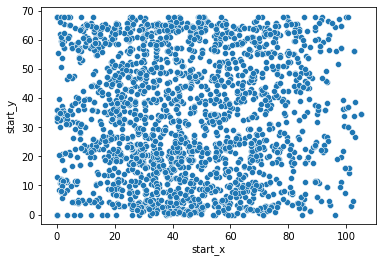

In [172]:
plt.figure()
sns.scatterplot(x=df_actions['start_x'], y=df_actions['start_y'])
plt.show()

In [173]:
df_actions = spadl.add_names(df_actions)
df_actions.head()

,game_id,original_event_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,type_id,result_id,bodypart_id,action_id,type_name,result_name,bodypart_name
0,3775648,d062f895-1e3c-4fff-9937-fa3c81408bf7,1,0.0,968,15623.0,52.058824,33.655696,51.176471,35.549367,0,1,0,0,pass,success,foot
1,3775648,0cb83915-5393-49da-9ade-106c9ef6a51e,1,0.0,968,15619.0,51.176471,35.549367,53.558824,34.258228,21,1,0,1,dribble,success,foot
2,3775648,edd39d4f-cbcf-428d-a6f6-80914c176414,1,0.0,968,15619.0,53.558824,34.258228,68.823529,33.483544,0,1,0,2,pass,success,foot
3,3775648,a281156d-530b-4cd5-90a7-e40004b135c3,1,1.0,968,10405.0,68.823529,33.483544,68.029412,34.516456,21,1,0,3,dribble,success,foot
4,3775648,dac600a7-e892-4dd2-a0f6-f06547c7d4d9,1,2.0,968,10405.0,68.029412,34.516456,70.323529,18.678481,0,1,0,4,pass,success,foot


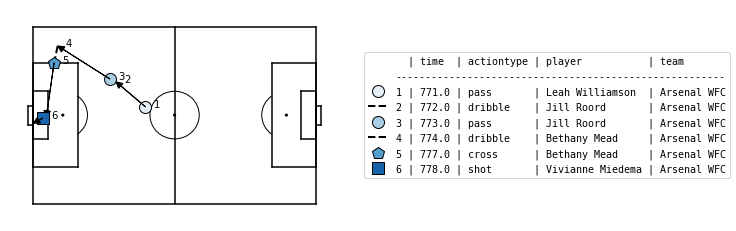

In [174]:
import matplotsoccer as mps

# Select relevant actions
df_actions_goal = df_actions.loc[1481 - 5: 1481]
# Replace result, actiontype and bodypart IDs by their corresponding name
df_actions_goal = spadl.add_names(df_actions_goal)
# Add team and player names
df_actions_goal = df_actions_goal.merge(df_teams).merge(df_players)
# Create the plot
mps.actions(
    location=df_actions_goal[["start_x", "start_y", "end_x", "end_y"]],
    action_type=df_actions_goal.type_name,
    team=df_actions_goal.team_name,
    result=df_actions_goal.result_name == "success",
    label=df_actions_goal[["time_seconds", "type_name", "player_name", "team_name"]],
    labeltitle=["time", "actiontype", "player", "team"],
    zoom=False
)

In [175]:
import socceraction.xthreat as xthreat
import socceraction.spadl as spadl

# 1. Load a set of actions to train the model on
actions = df_actions

# 2. Convert direction of play
# actions_ltr = pd.concat([
#   spadl.play_left_to_right(actions[game_id], game.home_team_id)
#   for game_id, game in df_games.iterrows()
# ])

actions = spadl.play_left_to_right(actions, home_team_id=home_team_id)

# 3. Train xT model
xTModel = xthreat.ExpectedThreat(l=16, w=12)
xTModel.fit(actions)

# 4. Rate ball-progressing actions
# xT should only be used to value actions that move the ball
# and that keep the current team in possession of the ball
mov_actions = xthreat.get_successful_move_actions(actions)
mov_actions["xT_value"] = xTModel.predict(mov_actions)

# iterations:  53


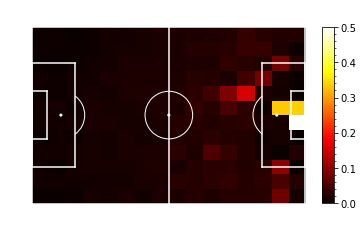

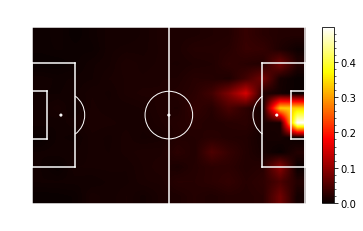

<AxesSubplot:>

In [176]:
# Inspect the learned heatmap
mps.heatmap(xTModel.xT, cmap="hot", linecolor="white", cbar="True")

# Inspect the interpolated heatmap used for predictions
interp = xTModel.interpolator()
x = np.linspace(0, 105, 1050)
y = np.linspace(0, 68, 680)
mps.heatmap(interp(x,y), cmap="hot", linecolor="white", cbar="True")

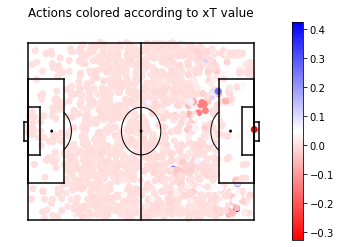

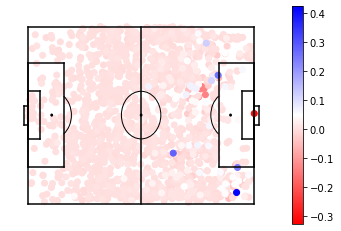

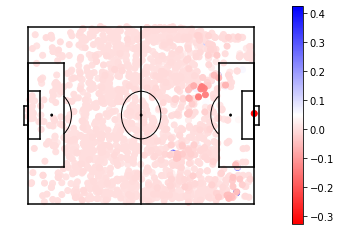

In [177]:
import matplotlib.pyplot as plt

## Visualize xT predictions 
a = mov_actions

# Show scatterplot of actions colored according to xT value
mps.field(show=False)
plt.title("Actions colored according to xT value")
plt.scatter(a.start_x, a.start_y, c=a.xT_value, cmap="bwr_r")
plt.colorbar()
plt.show()

# Show actions with low xT Values on top
a = a.sort_values("xT_value", ascending=True)
mps.field(show=False)
plt.scatter(a.start_x, a.start_y, c=a.xT_value, cmap="bwr_r")
plt.colorbar()
plt.show()

# Show actions with high xT Values on top
a = a.sort_values("xT_value", ascending=False)
mps.field(show=False)
plt.scatter(a.start_x, a.start_y, c=a.xT_value, cmap="bwr_r")
plt.colorbar()
plt.show()

In [178]:
from socceraction.vaep import VAEP
from tqdm import tqdm

VAEP_model = VAEP(nb_prev_actions=5)

# compute features and labels for each game
all_features, all_labels, all_actions = [], [], []
for game_id, game in tqdm(list(df_games.iterrows())):
    
    # load the game's events
    game_events = SBL.events(game_id)
    
    # convert the events to actions
    game_home_team_id = df_games.at[game_id, "home_team_id"]
    game_actions = spadl.statsbomb.convert_to_actions(game_events, game_home_team_id)
    game_actions = socceraction.spadl.add_names(game_actions)
    
    # compute features and labels
    all_actions.append(game_actions)
    all_features.append(VAEP_model.compute_features(game, game_actions))
    all_labels.append(VAEP_model.compute_labels(game, game_actions))

# combine all features and labels in a single dataframe
all_actions = pd.concat(all_actions)
all_features = pd.concat(all_features)
all_labels = pd.concat(all_labels)

# fit the model
VAEP_model.fit(all_features, all_labels)

100%|██████████| 131/131 [07:53<00:00,  3.61s/it]


[0]	validation_0-auc:0.76982
[1]	validation_0-auc:0.78395
[2]	validation_0-auc:0.78963
[3]	validation_0-auc:0.78963
[4]	validation_0-auc:0.80513
[5]	validation_0-auc:0.81827
[6]	validation_0-auc:0.82026
[7]	validation_0-auc:0.81972
[8]	validation_0-auc:0.82080
[9]	validation_0-auc:0.82156
[10]	validation_0-auc:0.82202
[11]	validation_0-auc:0.82360
[12]	validation_0-auc:0.82778
[13]	validation_0-auc:0.83004
[14]	validation_0-auc:0.83036
[15]	validation_0-auc:0.83035
[16]	validation_0-auc:0.83003
[17]	validation_0-auc:0.83099
[18]	validation_0-auc:0.83284
[19]	validation_0-auc:0.83337
[20]	validation_0-auc:0.83549
[21]	validation_0-auc:0.83484
[22]	validation_0-auc:0.83609
[23]	validation_0-auc:0.83784
[24]	validation_0-auc:0.83798
[25]	validation_0-auc:0.84015
[26]	validation_0-auc:0.84019
[27]	validation_0-auc:0.84059
[28]	validation_0-auc:0.84016
[29]	validation_0-auc:0.84131
[30]	validation_0-auc:0.84168
[31]	validation_0-auc:0.84418
[32]	validation_0-auc:0.84501
[33]	validation_0-au

In [179]:
VAEP_ratings = []
for game_id, game in tqdm(list(df_games.iterrows())):
    df_events = SBL.events(game_id)
    home_team_id = df_games.at[game_id, "home_team_id"]
    df_actions = spadl.statsbomb.convert_to_actions(df_events, home_team_id)
    ratings = VAEP_model.rate(df_games.loc[game_id], df_actions)
    VAEP_ratings.append(ratings)

100%|██████████| 131/131 [10:13<00:00,  4.68s/it]


In [180]:
VAEP_ratings = pd.concat(VAEP_ratings)

In [181]:
rated_df = pd.concat([all_actions, VAEP_ratings], axis=1)

In [182]:
rated_df.head()

,game_id,original_event_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,type_id,result_id,bodypart_id,action_id,type_name,result_name,bodypart_name,offensive_value,defensive_value,vaep_value
0,3775648,d062f895-1e3c-4fff-9937-fa3c81408bf7,1,0.0,968,15623.0,52.058824,33.655696,51.176471,35.549367,0,1,0,0,pass,success,foot,0.000000,-0.000000,0.000000
1,3775648,0cb83915-5393-49da-9ade-106c9ef6a51e,1,0.0,968,15619.0,51.176471,35.549367,53.558824,34.258228,21,1,0,1,dribble,success,foot,-0.000218,-0.000170,-0.000387
2,3775648,edd39d4f-cbcf-428d-a6f6-80914c176414,1,0.0,968,15619.0,53.558824,34.258228,68.823529,33.483544,0,1,0,2,pass,success,foot,-0.000293,0.000346,0.000053
3,3775648,a281156d-530b-4cd5-90a7-e40004b135c3,1,1.0,968,10405.0,68.823529,33.483544,68.029412,34.516456,21,1,0,3,dribble,success,foot,0.000121,-0.001437,-0.001317
4,3775648,dac600a7-e892-4dd2-a0f6-f06547c7d4d9,1,2.0,968,10405.0,68.029412,34.516456,70.323529,18.678481,0,1,0,4,pass,success,foot,0.000081,0.000046,0.000127


In [183]:
# 2. Convert direction of play
actions_ltr = pd.concat([
  spadl.play_left_to_right(all_actions[all_actions['game_id'] == game_id], game.home_team_id)
  for game_id, game in df_games.iterrows()
])

actions_ltr = socceraction.spadl.add_names(actions_ltr)
actions_ltr['original_index']=actions_ltr.index

# 3. Train xT model
xTModel = xthreat.ExpectedThreat(l=16, w=12)
xTModel.fit(actions_ltr)

# 4. Rate ball-progressing actions
# xT should only be used to value actions that move the ball
# and that keep the current team in possession of the ball
mov_actions = xthreat.get_successful_move_actions(actions_ltr)
mov_actions["xT_value"] = xTModel.predict(mov_actions)

# iterations:  39


In [184]:
mov_actions.head()

,game_id,original_event_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,type_id,result_id,bodypart_id,action_id,type_name,result_name,bodypart_name,original_index,xT_value
0,3775648,d062f895-1e3c-4fff-9937-fa3c81408bf7,1,0.0,968,15623.0,52.941176,34.344304,53.823529,32.450633,0,1,0,0,pass,success,foot,0,0.001182
1,3775648,0cb83915-5393-49da-9ade-106c9ef6a51e,1,0.0,968,15619.0,53.823529,32.450633,51.441176,33.741772,21,1,0,1,dribble,success,foot,1,-0.002676
2,3775648,edd39d4f-cbcf-428d-a6f6-80914c176414,1,0.0,968,15619.0,51.441176,33.741772,36.176471,34.516456,0,1,0,2,pass,success,foot,2,-0.002530
3,3775648,a281156d-530b-4cd5-90a7-e40004b135c3,1,1.0,968,10405.0,36.176471,34.516456,36.970588,33.483544,21,1,0,3,dribble,success,foot,3,-0.000073
4,3775648,dac600a7-e892-4dd2-a0f6-f06547c7d4d9,1,2.0,968,10405.0,36.970588,33.483544,34.676471,49.321519,0,1,0,4,pass,success,foot,4,0.000137


## Creating new Features

### Features to add in

**Notebooks:**

- Single match exploration and variables/data discovery
- Data prep across seasons - build main dataset and split into test/validate/test
- Statistical testing inputs against targets
- Clustering player targets, predicting next actions, validating and testing 
- Predicting transfers


**Input Features:**

- 'game_id' - maybe (might need it to generate features, but drop before feeding model)
- 'original_event_id' - maybe
- 'period_id' 
- 'time_seconds' - maybe
- 'team_id',   
- 'player_id', 
- 'start_x', 
- 'start_y', 


These would not feed into the model, as they wouldnt be known yet for the line I am running prediction on - they should be represented in the n-x columns only as part of the previous moves. 

```
- 'end_x', 
- 'end_y',
- 'type_id',
- 'result_id', 
- 'bodypart_id', 
- 'action_id', 
- 'type_name', 
- 'result_name',
- 'bodypart_name', 
```


**To add:**
- Distance X
- Distance Y 
- 'start_pitch_zone'
- end_pitch_zone
- opponent
- home (how would this work when getting predictions? and when training)
- away

**For actions n-5:**
(if using a dataset with multiple matches, make sure they are from the same game)
- Prev_action_n-x_x_distance
- Prev_action_n-x_y_distance
- n-x_same_team
- n-x_same_player
- n-x_x_direction 
- n-x_y_direction
- n-x_action
- n-x_pitch_zone

**Target output:**

- Type of action 
- Next Zone

```some of these will need to be dummied```

**Football Scoring Metrics**
- xT per action 
- VAEP 
- aggregates at player level

Then swap the player ID for the player that we'd want to swap in to create a prediction dataset. 
(see if there is a transfer within the datast we could use as validation of the model)

- use the first 2 seasons for train and validate and the last season for test 
- predict the actions of players that had a transfer between season 2 and 3 - to test how the prediction does 

Each line of data should be standalone, rather than sequential - transforming sequential - time series type data - into non-sequential data

Then xT and VEAP output

In [185]:
df_actions_zones = rated_df.copy()

matches = []
for game_id, game in tqdm(list(df_games.iterrows())):
    
    # load the game's events
    game_events = SBL.events(game_id)
    
    # convert the events to actions
    game_home_team_id = df_games.at[game_id, "home_team_id"]
    matches.append(spadl.play_left_to_right(df_actions_zones[df_actions_zones['game_id'] == game_id], home_team_id==home_team_id))

df_actions_zones = pd.concat(matches)

100%|██████████| 131/131 [00:22<00:00,  5.87it/s]


In [371]:
players = []
for game_id, game in tqdm(list(df_games.iterrows())):
    
    # load the game's events
    players.append(SBL.players(game_id))


players = pd.concat(players, ignore_index=True)

100%|██████████| 131/131 [01:31<00:00,  1.43it/s]


In [187]:
zones = []
end_zones = []

for i, row in df_actions_zones.iterrows():
    if ((row['start_x'] >=0) & (row['start_x'] < 35)) & ((row['start_y']>=0) & (row['start_y'] < 23)):
        zones.append('zone_1')
    elif ((row['start_x'] >=0) & (row['start_x'] < 35)) & ((row['start_y']>=23) & (row['start_y'] < 46)):
        zones.append('zone_2')
    elif ((row['start_x'] >=0) & (row['start_x'] < 35)) & ((row['start_y']>=46) & (row['start_y'] <= 69)):
        zones.append('zone_3')
    elif ((row['start_x'] >=35) & (row['start_x'] < 70)) & ((row['start_y']>=0) & (row['start_y'] < 23)):
        zones.append('zone_4')
    elif ((row['start_x'] >=35) & (row['start_x'] < 70)) & ((row['start_y']>=23) & (row['start_y'] < 46)):
        zones.append('zone_5')
    elif ((row['start_x'] >=35) & (row['start_x'] < 70)) & ((row['start_y']>=46) & (row['start_y'] <= 69)):
        zones.append('zone_6')
    elif ((row['start_x'] >=70) & (row['start_x'] <= 105)) & ((row['start_y']>=0) & (row['start_y'] < 23)):
        zones.append('zone_7')
    elif ((row['start_x'] >=70) & (row['start_x'] <= 105)) & ((row['start_y']>=23) & (row['start_y'] < 46)):
        zones.append('zone_8')
    elif ((row['start_x'] >=70) & (row['start_x'] <= 105)) & ((row['start_y']>=46) & (row['start_y'] <= 69)):
        zones.append('zone_9')
    else:
        zones.append('no_zone')

for i, row in df_actions_zones.iterrows():
    if ((row['end_x'] >=0) & (row['end_x'] < 35)) & ((row['end_y']>=0) & (row['end_y'] < 23)):
        end_zones.append('zone_1')
    elif ((row['end_x'] >=0) & (row['end_x'] < 35)) & ((row['end_y']>=23) & (row['end_y'] < 46)):
        end_zones.append('zone_2')
    elif ((row['end_x'] >=0) & (row['end_x'] < 35)) & ((row['end_y']>=46) & (row['end_y'] <= 69)):
        end_zones.append('zone_3')
    elif ((row['end_x'] >=35) & (row['end_x'] < 70)) & ((row['end_y']>=0) & (row['end_y'] < 23)):
        end_zones.append('zone_4')
    elif ((row['end_x'] >=35) & (row['end_x'] < 70)) & ((row['end_y']>=23) & (row['end_y'] < 46)):
        end_zones.append('zone_5')
    elif ((row['end_x'] >=35) & (row['end_x'] < 70)) & ((row['end_y']>=46) & (row['end_y'] <= 69)):
        end_zones.append('zone_6')
    elif ((row['end_x'] >=70) & (row['end_x'] <= 105)) & ((row['end_y']>=0) & (row['end_y'] < 23)):
        end_zones.append('zone_7')
    elif ((row['end_x'] >=70) & (row['end_x'] <= 105)) & ((row['end_y']>=23) & (row['end_y'] < 46)):
        end_zones.append('zone_8')
    elif ((row['end_x'] >=70) & (row['end_x'] <= 105)) & ((row['end_y']>=46) & (row['end_y'] <= 69)):
        end_zones.append('zone_9')
    else:
        end_zones.append('no_zone')

df_actions_zones['end_pitch_zone'] = end_zones
df_actions_zones['start_pitch_zone'] = zones


In [188]:
mov_actions_with_zones = mov_actions.copy()

In [189]:
zones = []
end_zones = []

for i, row in mov_actions_with_zones.iterrows():
    if ((row['start_x'] >=0) & (row['start_x'] < 35)) & ((row['start_y']>=0) & (row['start_y'] < 23)):
        zones.append('zone_1')
    elif ((row['start_x'] >=0) & (row['start_x'] < 35)) & ((row['start_y']>=23) & (row['start_y'] < 46)):
        zones.append('zone_2')
    elif ((row['start_x'] >=0) & (row['start_x'] < 35)) & ((row['start_y']>=46) & (row['start_y'] <= 69)):
        zones.append('zone_3')
    elif ((row['start_x'] >=35) & (row['start_x'] < 70)) & ((row['start_y']>=0) & (row['start_y'] < 23)):
        zones.append('zone_4')
    elif ((row['start_x'] >=35) & (row['start_x'] < 70)) & ((row['start_y']>=23) & (row['start_y'] < 46)):
        zones.append('zone_5')
    elif ((row['start_x'] >=35) & (row['start_x'] < 70)) & ((row['start_y']>=46) & (row['start_y'] <= 69)):
        zones.append('zone_6')
    elif ((row['start_x'] >=70) & (row['start_x'] <= 105)) & ((row['start_y']>=0) & (row['start_y'] < 23)):
        zones.append('zone_7')
    elif ((row['start_x'] >=70) & (row['start_x'] <= 105)) & ((row['start_y']>=23) & (row['start_y'] < 46)):
        zones.append('zone_8')
    elif ((row['start_x'] >=70) & (row['start_x'] <= 105)) & ((row['start_y']>=46) & (row['start_y'] <= 69)):
        zones.append('zone_9')
    else:
        zones.append('no_zone')

for i, row in mov_actions_with_zones.iterrows():
    if ((row['end_x'] >=0) & (row['end_x'] < 35)) & ((row['end_y']>=0) & (row['end_y'] < 23)):
        end_zones.append('zone_1')
    elif ((row['end_x'] >=0) & (row['end_x'] < 35)) & ((row['end_y']>=23) & (row['end_y'] < 46)):
        end_zones.append('zone_2')
    elif ((row['end_x'] >=0) & (row['end_x'] < 35)) & ((row['end_y']>=46) & (row['end_y'] <= 69)):
        end_zones.append('zone_3')
    elif ((row['end_x'] >=35) & (row['end_x'] < 70)) & ((row['end_y']>=0) & (row['end_y'] < 23)):
        end_zones.append('zone_4')
    elif ((row['end_x'] >=35) & (row['end_x'] < 70)) & ((row['end_y']>=23) & (row['end_y'] < 46)):
        end_zones.append('zone_5')
    elif ((row['end_x'] >=35) & (row['end_x'] < 70)) & ((row['end_y']>=46) & (row['end_y'] <= 69)):
        end_zones.append('zone_6')
    elif ((row['end_x'] >=70) & (row['end_x'] <= 105)) & ((row['end_y']>=0) & (row['end_y'] < 23)):
        end_zones.append('zone_7')
    elif ((row['end_x'] >=70) & (row['end_x'] <= 105)) & ((row['end_y']>=23) & (row['end_y'] < 46)):
        end_zones.append('zone_8')
    elif ((row['end_x'] >=70) & (row['end_x'] <= 105)) & ((row['end_y']>=46) & (row['end_y'] <= 69)):
        end_zones.append('zone_9')
    else:
        end_zones.append('no_zone')

mov_actions_with_zones['end_pitch_zone'] = end_zones
mov_actions_with_zones['start_pitch_zone'] = zones

In [198]:
# opposition 
matches = list(df_actions_zones['game_id'].unique())
match_teams = {match: list(df_actions_zones[df_actions_zones['game_id'] == match]['team_id'].unique()) for match in matches}

df_actions_zones['opponent_id'] = [match_teams[k][1] if match_teams[k][0] == row['team_id'] else match_teams[k][0] \
     for i, row in df_actions_zones.iterrows() \
        for k, v in match_teams.items() \
            if row['game_id'] == k]

# Home or Away
df_actions_zones['home'] = [1 if np.array(df_games[df_games.index == row['game_id']]['home_team_id'] == row['team_id'])[0] \
    else 0 for i, row in df_actions_zones.iterrows() \
        for match in matches if row['game_id'] == match]

# x and y distance traveled 
df_actions_zones['x_dif'] = (df_actions_zones['end_x'] - df_actions_zones['start_x'])
df_actions_zones['y_dif'] = (df_actions_zones['end_y'] - df_actions_zones['start_y'])

#prior moves
print('Starting prior moves block')
for n in range(1,6):
    df_actions_zones[f'n-{n}_x_distance'] = df_actions_zones.groupby('game_id').shift(n)[['x_dif']]
    df_actions_zones[f'n-{n}_y_distance'] = df_actions_zones.groupby('game_id').shift(n)[['y_dif']]
    df_actions_zones[f'n-{n}_same_team'] = df_actions_zones.team_id.eq(df_actions_zones.team_id.shift(n))
    df_actions_zones[f'n-{n}_same_player'] = df_actions_zones.player_id.eq(df_actions_zones.player_id.shift(n))
    df_actions_zones[f'n-{n}_x_fwd_direction'] = [1 if row['x_dif'] > 0 else 0 for i, row in df_actions_zones.groupby('game_id').shift(n).iterrows()]
    df_actions_zones[f'n-{n}_y_lft_right_direction'] = [1 if row['y_dif'] > 0 else 0 for i, row in df_actions_zones.groupby('game_id').shift(n).iterrows()]
    df_actions_zones[f'n-{n}_start_pitch_zone'] = df_actions_zones.groupby('game_id').shift(n)[['start_pitch_zone']]
    df_actions_zones[f'n-{n}_end_pitch_zone'] = df_actions_zones.groupby('game_id').shift(n)[['end_pitch_zone']]
    df_actions_zones[f'n-{n}_start_x'] = df_actions_zones.groupby('game_id').shift(n)[['start_x']]
    df_actions_zones[f'n-{n}_start_y'] = df_actions_zones.groupby('game_id').shift(n)[['start_y']]
    df_actions_zones[f'n-{n}_end_x'] = df_actions_zones.groupby('game_id').shift(n)[['end_x']]
    df_actions_zones[f'n-{n}_end_y'] = df_actions_zones.groupby('game_id').shift(n)[['end_y']]
    df_actions_zones[f'n-{n}_type_id'] = df_actions_zones.groupby('game_id').shift(n)[['type_id']]
    df_actions_zones[f'n-{n}_result_id'] = df_actions_zones.groupby('game_id').shift(n)[['result_id']]
    df_actions_zones[f'n-{n}_bodypart_id'] = df_actions_zones.groupby('game_id').shift(n)[['bodypart_id']]
    df_actions_zones[f'n-{n}_type_name'] = df_actions_zones.groupby('game_id').shift(n)[['type_name']]
    df_actions_zones[f'n-{n}_result_name'] = df_actions_zones.groupby('game_id').shift(n)[['result_name']]
    df_actions_zones[f'n-{n}_bodypart_name'] = df_actions_zones.groupby('game_id').shift(n)[['bodypart_name']]

Starting prior moves block


TO DO:

0. add a notebook 1 with a single match exploration - this becomes notebook 2 
1. group by zones and add in xT & VAEP Scores 
2. Visualise those 
3. Find top players for each team by xT for their end locations 
4. Calculate the xT difference between the start and end location 
5. EDA into notebook 2 - add in 5 EDA sections
    - zone analysis
    - top players
    - heatmaps for passes/dribbles/crosses and end_zones 
    - distance analysis 

other:
- modify code to add in seasons 1,2 - create season 3 as a separate test dataset 
- find player transfers


In [256]:
xt_zone_values = mov_actions_with_zones[['end_pitch_zone', 'xT_value']].groupby('end_pitch_zone').mean().reset_index()

In [257]:
vaep_zone_values = df_actions_zones[['end_pitch_zone', 'vaep_value']].groupby('end_pitch_zone').mean().reset_index()

In [258]:
zone_values = pd.concat([vaep_zone_values, xt_zone_values['xT_value']], axis=1)

In [259]:
action_vaep = df_actions_zones[['type_name', 'vaep_value']].groupby('type_name').mean().reset_index()

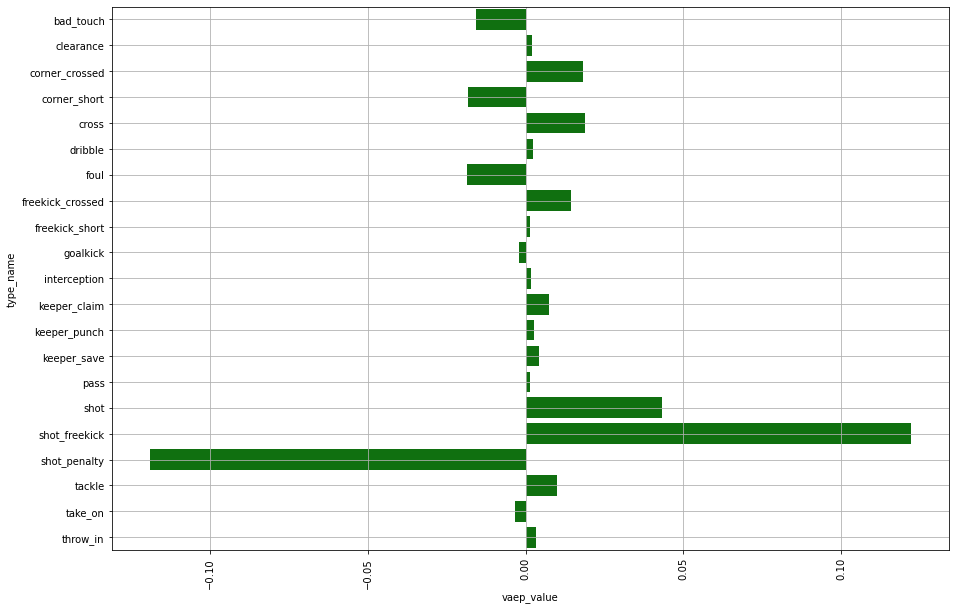

In [214]:
plt.figure(figsize=(15,10))
sns.barplot(y=action_vaep['type_name'], x=action_vaep['vaep_value'], color='green')
plt.xticks(rotation='90')
plt.grid()
plt.show()

In [246]:
df_actions_zones.groupby('end_pitch_zone').describe()['x_dif'].reset_index()

,end_pitch_zone,count,mean,std,min,25%,50%,75%,max
0,zone_1,23684.0,-3.573574,12.673177,-90.000000,-7.411765,0.000000,2.029412,32.911765
1,zone_2,25986.0,-3.927000,11.144881,-90.088235,-8.205882,-0.264706,1.588235,32.647059
2,zone_3,25516.0,-3.507498,12.776328,-100.411765,-7.147059,0.000000,1.941176,31.676471
3,zone_4,40255.0,0.113063,13.274432,-63.617647,-4.764706,0.000000,4.676471,63.882353
4,zone_5,27363.0,0.036722,12.119557,-62.558824,-4.235294,0.000000,4.147059,63.176471
5,zone_6,39530.0,0.023221,13.277912,-67.764706,-4.676471,0.000000,4.852941,64.411765
6,zone_7,24484.0,3.607690,12.798746,-32.647059,-2.029412,0.000000,7.323529,97.588235
7,zone_8,24721.0,3.888917,11.289097,-32.294118,-1.676471,0.264706,8.117647,89.647059
8,zone_9,21986.0,3.735893,12.983093,-34.235294,-1.941176,0.000000,7.676471,96.000000


In [260]:
zone_values = pd.concat([zone_values, df_actions_zones.groupby('end_pitch_zone').describe()['x_dif'].reset_index().drop(columns=['end_pitch_zone'])], axis=1)

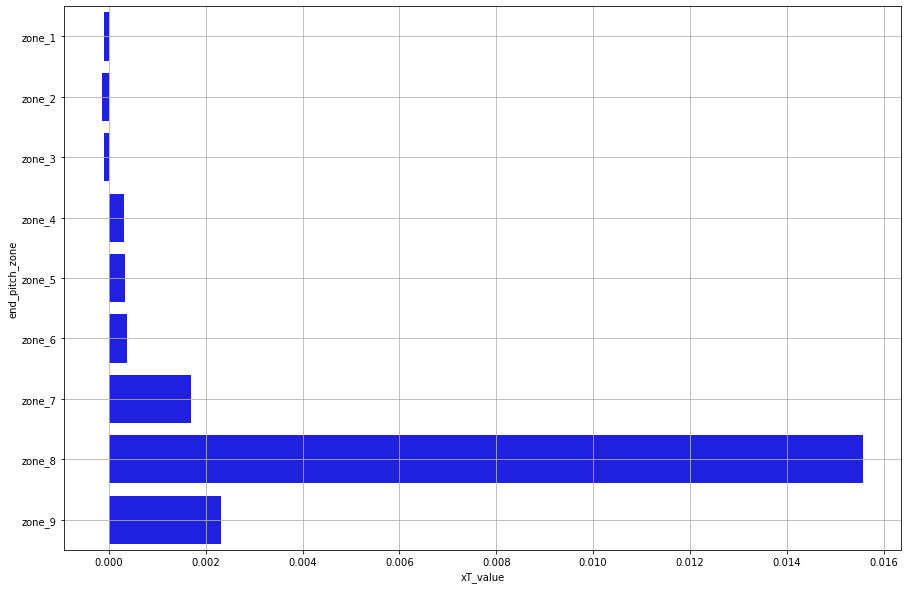

In [220]:
plt.figure(figsize=(15,10))
sns.barplot(y=zone_values['end_pitch_zone'], x=zone_values['xT_value'], color='blue')
plt.grid(True)
plt.show()

In [356]:
player_end_zone_counts = df_actions_zones.groupby('player_id')[['end_pitch_zone', 'type_name']].value_counts().reset_index()

In [357]:
player_end_zone_counts.head()

,player_id,end_pitch_zone,type_name,0
0,4633.0,zone_4,pass,263
1,4633.0,zone_4,dribble,257
2,4633.0,zone_5,pass,241
3,4633.0,zone_6,pass,233
4,4633.0,zone_6,dribble,217


In [359]:
player_end_zone_counts.rename(columns={0:'count'}, inplace=True)

In [366]:
top_zone_players = player_end_zone_counts[player_end_zone_counts['end_pitch_zone']=='zone_8'].sort_values(by='count', ascending=False).head(50)['player_id']

In [270]:
top_5_vaep_players = list(df_actions_zones.groupby('player_id')['vaep_value'].sum().sort_values(ascending=False).head(5).reset_index()['player_id'])

In [354]:
players[players.player_id.isin(top_5_vaep_players)].drop_duplicates(subset=['player_name'])

,game_id,team_id,player_id,player_name,nickname,jersey_number,is_starter,starting_position_id,starting_position_name,minutes_played
23,3775648,968,15620,Katie McCabe,None,15,True,6,Left Back,93
24,3775648,968,15623,Vivianne Miedema,None,11,True,21,Left Wing,70
2,3775581,971,4641,Francesca Kirby,None,14,True,10,Center Defensive Midfield,60
6,3775581,971,4961,Samantha May Kerr,None,20,True,23,Center Forward,64
11,3775624,746,15570,Chloe Kelly,None,9,True,17,Right Wing,98


In [373]:
players[players.player_id.isin(top_zone_players)].drop_duplicates(subset=['player_name'])

,game_id,team_id,player_id,player_name,nickname,jersey_number,is_starter,starting_position_id,starting_position_name,minutes_played
7,3775648,2647,38317,Lisa Weiß,None,29,True,1,Goalkeeper,93
13,3775648,968,5066,Lydia Grace Yilkari Williams,None,18,True,1,Goalkeeper,93
18,3775648,968,10405,Lia Wälti,None,13,True,10,Center Defensive Midfield,93
19,3775648,968,10650,Jill Roord,None,14,True,15,Left Center Midfield,75
20,3775648,968,10658,Danielle van de Donk,None,7,True,13,Right Center Midfield,75
23,3775648,968,15620,Katie McCabe,None,15,True,6,Left Back,93
24,3775648,968,15623,Vivianne Miedema,None,11,True,21,Left Wing,70
26,3775648,968,18999,Leah Williamson,None,6,True,3,Right Center Back,93
27,3775648,968,49697,Carlotte Wubben-Moy,None,3,False,0,Substitute,14
53,3775609,972,34232,Grace Fisk,None,22,True,4,Center Back,94


In [ ]:
# #prior moves
# for n in range(1,6):
#     df_actions_zones[f'n-{n}_x_distance'] = [row['x_dif'] for i, row in df_actions_zones.shift(n, axi).iterrows()]
#     df_actions_zones[f'n-{n}_y_distance'] = [row['y_dif'] for i, row in df_actions_zones.shift(n).iterrows()]
#     df_actions_zones[f'n-{n}_same_team'] = df_actions_zones.team_id.eq(df_actions_zones.team_id.shift(n))
#     df_actions_zones[f'n-{n}_same_player'] = df_actions_zones.player_id.eq(df_actions_zones.player_id.shift(n))
#     df_actions_zones[f'n-{n}_x_fwd_direction'] = [1 if row['x_dif'] > 0 else 0 for i, row in df_actions_zones.shift(n).iterrows()]
#     df_actions_zones[f'n-{n}_y_lft_right_direction'] = [1 if row['y_dif'] > 0 else 0 for i, row in df_actions_zones.shift(n).iterrows()]
#     df_actions_zones[f'n-{n}_start_pitch_zone'] = [row['start_pitch_zone'] for i, row in df_actions_zones.shift(n).iterrows()]
#     df_actions_zones[f'n-{n}_end_pitch_zone'] = [row['end_pitch_zone'] for i, row in df_actions_zones.shift(n).iterrows()]
#     df_actions_zones[f'n-{n}_start_x'] = [row['start_x'] for i, row in df_actions_zones.shift(n).iterrows()]
#     df_actions_zones[f'n-{n}_start_y'] = [row['start_y'] for i, row in df_actions_zones.shift(n).iterrows()]
#     df_actions_zones[f'n-{n}_end_x'] = [row['end_x'] for i, row in df_actions_zones.shift(n).iterrows()]
#     df_actions_zones[f'n-{n}_end_y'] = [row['end_y'] for i, row in df_actions_zones.shift(n).iterrows()]
#     df_actions_zones[f'n-{n}_type_id'] = [row['type_id'] for i, row in df_actions_zones.shift(n).iterrows()]
#     df_actions_zones[f'n-{n}_result_id'] = [row['result_id'] for i, row in df_actions_zones.shift(n).iterrows()] 
#     df_actions_zones[f'n-{n}_bodypart_id'] = [row['bodypart_id'] for i, row in df_actions_zones.shift(n).iterrows()]

In [199]:
#We're working with a wide dataset, and may wish to view all columns when reviewing a dataframe
pd.set_option("display.max_rows", None, "display.max_columns", None)

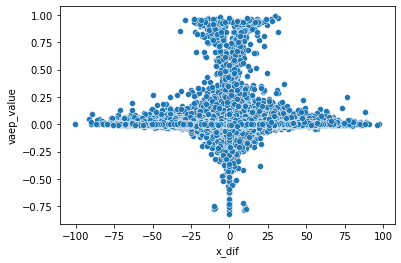

In [288]:
plt.figure()
sns.scatterplot(data=df_actions_zones, x='x_dif', y='vaep_value')
plt.show()

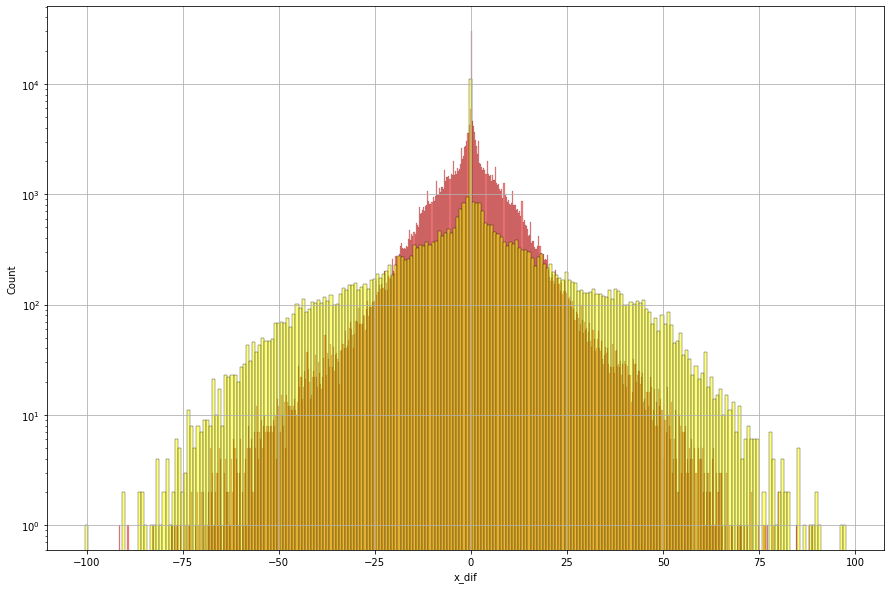

In [304]:
plt.figure(figsize=(15,10))
sns.histplot(df_actions_zones[df_actions_zones['result_name'] == 'success']['x_dif'], alpha=0.5, color='red')
sns.histplot(df_actions_zones[df_actions_zones['result_name'] != 'success']['x_dif'], alpha=0.5, color='yellow')
plt.grid()
plt.yscale('log')
plt.show()

In [332]:
df_actions_zones.head()

,game_id,original_event_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,type_id,result_id,bodypart_id,action_id,type_name,result_name,bodypart_name,offensive_value,defensive_value,vaep_value,end_pitch_zone,start_pitch_zone,opponent_id,home,x_dif,y_dif,n-1_x_distance,n-1_y_distance,n-1_same_team,n-1_same_player,n-1_x_fwd_direction,n-1_y_lft_right_direction,n-1_start_pitch_zone,n-1_end_pitch_zone,n-1_start_x,n-1_start_y,n-1_end_x,n-1_end_y,n-1_type_id,n-1_result_id,n-1_bodypart_id,n-2_x_distance,n-2_y_distance,n-2_same_team,n-2_same_player,n-2_x_fwd_direction,n-2_y_lft_right_direction,n-2_start_pitch_zone,n-2_end_pitch_zone,n-2_start_x,n-2_start_y,n-2_end_x,n-2_end_y,n-2_type_id,n-2_result_id,n-2_bodypart_id,n-3_x_distance,n-3_y_distance,n-3_same_team,n-3_same_player,n-3_x_fwd_direction,n-3_y_lft_right_direction,n-3_start_pitch_zone,n-3_end_pitch_zone,n-3_start_x,n-3_start_y,n-3_end_x,n-3_end_y,n-3_type_id,n-3_result_id,n-3_bodypart_id,n-4_x_distance,n-4_y_distance,n-4_same_team,n-4_same_player,n-4_x_fwd_direction,n-4_y_lft_right_direction,n-4_start_pitch_zone,n-4_end_pitch_zone,n-4_start_x,n-4_start_y,n-4_end_x,n-4_end_y,n-4_type_id,n-4_result_id,n-4_bodypart_id,n-5_x_distance,n-5_y_distance,n-5_same_team,n-5_same_player,n-5_x_fwd_direction,n-1_type_name,n-1_result_name,n-1_bodypart_name,n-2_type_name,n-2_result_name,n-2_bodypart_name,n-3_type_name,n-3_result_name,n-3_bodypart_name,n-4_type_name,n-4_result_name,n-4_bodypart_name,n-5_y_lft_right_direction,n-5_start_pitch_zone,n-5_end_pitch_zone,n-5_start_x,n-5_start_y,n-5_end_x,n-5_end_y,n-5_type_id,n-5_result_id,n-5_bodypart_id,n-5_type_name,n-5_result_name,n-5_bodypart_name
0,3775648,d062f895-1e3c-4fff-9937-fa3c81408bf7,1,0.0,968,15623.0,52.941176,34.344304,53.823529,32.450633,0,1,0,0,pass,success,foot,0.000000,-0.000000,0.000000,zone_5,zone_5,2647,0,0.882353,-1.893671,NaN,NaN,False,False,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3775648,0cb83915-5393-49da-9ade-106c9ef6a51e,1,0.0,968,15619.0,53.823529,32.450633,51.441176,33.741772,21,1,0,1,dribble,success,foot,-0.000218,-0.000170,-0.000387,zone_5,zone_5,2647,0,-2.382353,1.291139,0.882353,-1.893671,True,False,1,0,zone_5,zone_5,52.941176,34.344304,53.823529,32.450633,0.0,1.0,0.0,NaN,NaN,False,False,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0,pass,success,foot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3775648,edd39d4f-cbcf-428d-a6f6-80914c176414,1,0.0,968,15619.0,51.441176,33.741772,36.176471,34.516456,0,1,0,2,pass,success,foot,-0.000293,0.000346,0.000053,zone_5,zone_5,2647,0,-15.264706,0.774684,-2.382353,1.291139,True,True,0,1,zone_5,zone_5,53.823529,32.450633,51.441176,33.741772,21.0,1.0,0.0,0.882353,-1.893671,True,False,1,0,zone_5,zone_5,52.941176,34.344304,53.823529,32.450633,0.0,1.0,0.0,NaN,NaN,False,False,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0,dribble,success,foot,pass,success,foot,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3775648,a281156d-530b-4cd5-90a7-e40004b135c3,1,1.0,968,10405.0,36.176471,34.516456,36.970588,33.483544,21,1,0,3,dribble,success,foot,0.000121,-0.001437,-0.001317,zone_5,zone_5,2647,0,0.794118,-1.032911,-15.264706,0.774684,True,False,0,1,zone_5,zone_5,51.441176,33.741772,36.176471,34.516456,0.0,1.0,0.0,-2.382353,1.291139,True,False,0,1,zone_5,zone_5,53.823529,32.450633,51.441176,33.741772,21.0,1.0,0.0,0.882353,-1.893671,True,False,1,0,zone_5,zone_5,52.941176,34.344304,53.823529,32.450633,0.0,1

In [388]:
heatmap_data =df_actions_zones[['end_pitch_zone', 'type_name']].value_counts().reset_index()

In [390]:
heatmap_data.rename(columns={0:'count'}, inplace=True)

In [397]:
heatmap_data = heatmap_data.pivot('end_pitch_zone', 'type_name', 'count')

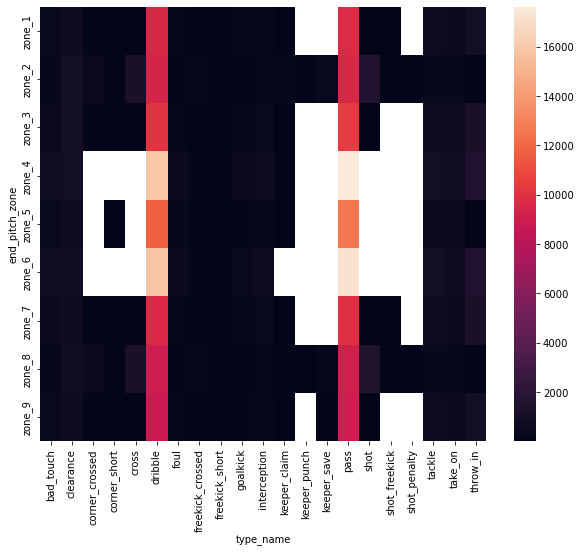

In [399]:
plt.figure(figsize=(10,8))
sns.heatmap(heatmap_data)
plt.show()

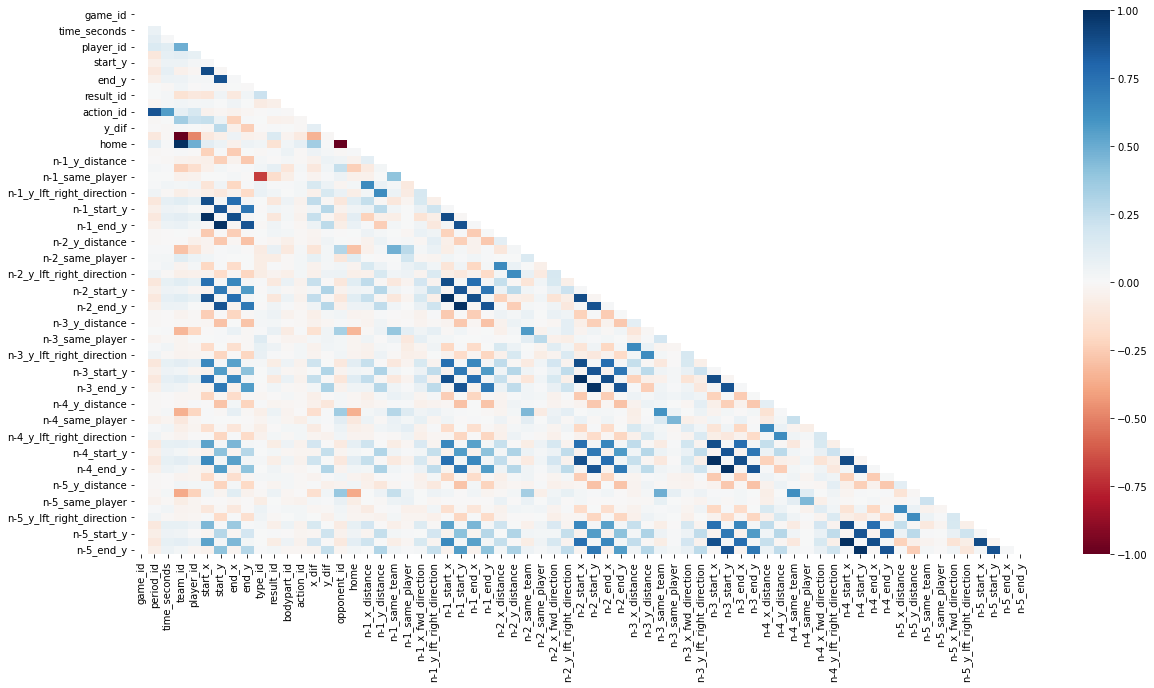

In [ ]:
# find the correlation between the variables
corr = df_actions_zones.corr()

# plot the correlation matrix using a heatmap
plt.figure(figsize=(20,10))
matrix = np.triu(corr)
sns.heatmap(corr, mask=matrix, cmap='RdBu')
plt.show()

In [ ]:
# from scipy import stats 
# data = []
# for column in corr:
#     data.append(stats.pearsonr(df_actions_zones['end_x'], df_actions_zones[column]))

# num_col_corr = pd.DataFrame(data, index=corr.columns, columns=['Correlation', 'P_value'])
# num_col_corr.style.background_gradient(cmap='Oranges')

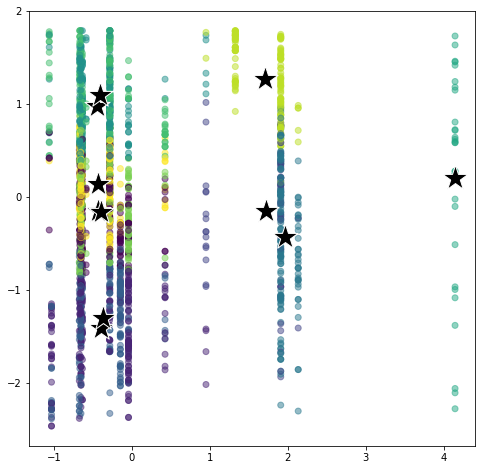

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = df_actions_zones[['player_id', 'start_x', 'start_y']]

ss = StandardScaler()

X = ss.fit_transform(X)

# Instantiate
k_means_model_2= KMeans(n_clusters=11)

# Fit
k_means_model_2.fit(X)
cluster_labels = k_means_model_2.predict(X)
centers = k_means_model_2.cluster_centers_

plt.figure(figsize=(8, 8))
plt.scatter(X[:,0], X[:,1], c=cluster_labels, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], 
            c='black', marker="*", edgecolor="white", s=700)
plt.show()